<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part6_P231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hansjang/Py_Radar.git

import shutil
shutil.move('Py_Radar/data', '/content/data')

# 폴더와 그 안의 모든 파일을 삭제
# !rm -rf /content/Py_Radar
# !rm -rf /content/data

Cloning into 'Py_Radar'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 199 (delta 13), reused 0 (delta 0), pack-reused 166 (from 1)
Receiving objects: 100% (199/199), 6.88 MiB | 21.76 MiB/s, done.
Resolving deltas: 100% (99/99), done.


'/content/data'

## DecisionTreeClassifier

In [7]:
import numpy as np
import pandas as pd

credit = pd.read_csv('/content/data/credit_final.csv')
display(credit.head())
display(credit['credit.rating'].value_counts())

# 결측치
display(credit.isna().sum())

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


,count
credit.rating,
1,700
0,300


,0
credit.rating,0
account.balance,0
credit.duration.months,0
previous.credit.payment.status,0
credit.purpose,0
credit.amount,0
savings,0
employment.duration,0
installment.rate,0
marital.status,0


In [27]:
# 데이터 분할
feature_columns = list(credit.columns.difference(['credit.rating']))
x = credit[feature_columns]
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    stratify = y,
                                                    train_size = 0.7,
                                                    random_state = 1)
display(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

# 모델 학습
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(train_x, train_y)

(700, 20)

(700,)

(300, 20)

(300,)

DecisionTreeClassifier(max_depth=3)

In [28]:
# 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

pred = clf.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc * 100, 2)))  # 정확도	70.67%
print('정밀도\t{}%'.format(round(test_prc * 100, 2)))  # 정밀도	75.42%
print('재현율\t{}%'.format(round(test_rll * 100, 2)))  # 재현율	86.19%
print('F1점수\t{}%'.format(round(test_f1 * 100, 2)))   # F1점수	80.44%

[[ 31  59]
 [ 29 181]]


정확도	70.67%
정밀도	75.42%
재현율	86.19%
F1점수	80.44%


In [29]:
from sklearn.metrics import classification_report
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.34      0.41        90
           1       0.75      0.86      0.80       210

    accuracy                           0.71       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.68      0.71      0.69       300



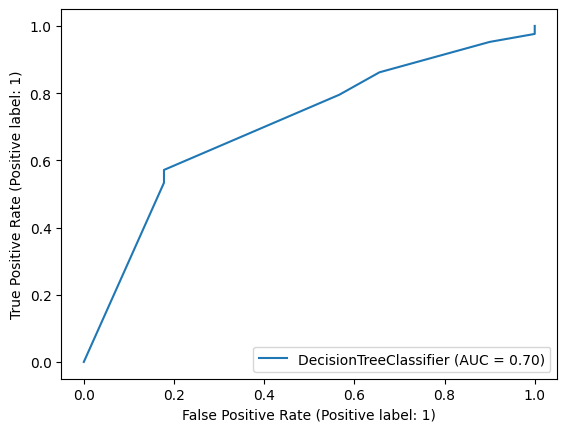

ROC AUC Score:  0.704973544973545


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# ROC curve 그리기 (Scikit-learn 최신 버전 사용)
RocCurveDisplay.from_estimator(clf, test_x, test_y)
plt.show()

# ROC AUC 점수 계산
R_A_score = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])  # 전체 데이터 사용
print("ROC AUC Score: ", R_A_score)


In [31]:
# 변수중요도
importances = clf.feature_importances_
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis = 1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.398169
1                              age     0.112429
2                   apartment.type     0.000000
3                     bank.credits     0.000000
4                    credit.amount     0.049625
5           credit.duration.months     0.232832
6                   credit.purpose     0.000000
7                   current.assets     0.000000
8                       dependents     0.000000
9              employment.duration     0.000000
10                  foreign.worker     0.000000
11                       guarantor     0.000000
12                installment.rate     0.000000
13                  marital.status     0.000000
14                      occupation     0.000000
15                   other.credits     0.000000
16  previous.credit.payment.status     0.126671
17              residence.duration     0.000000
18                         savings     0.080275
19                       telephone     0

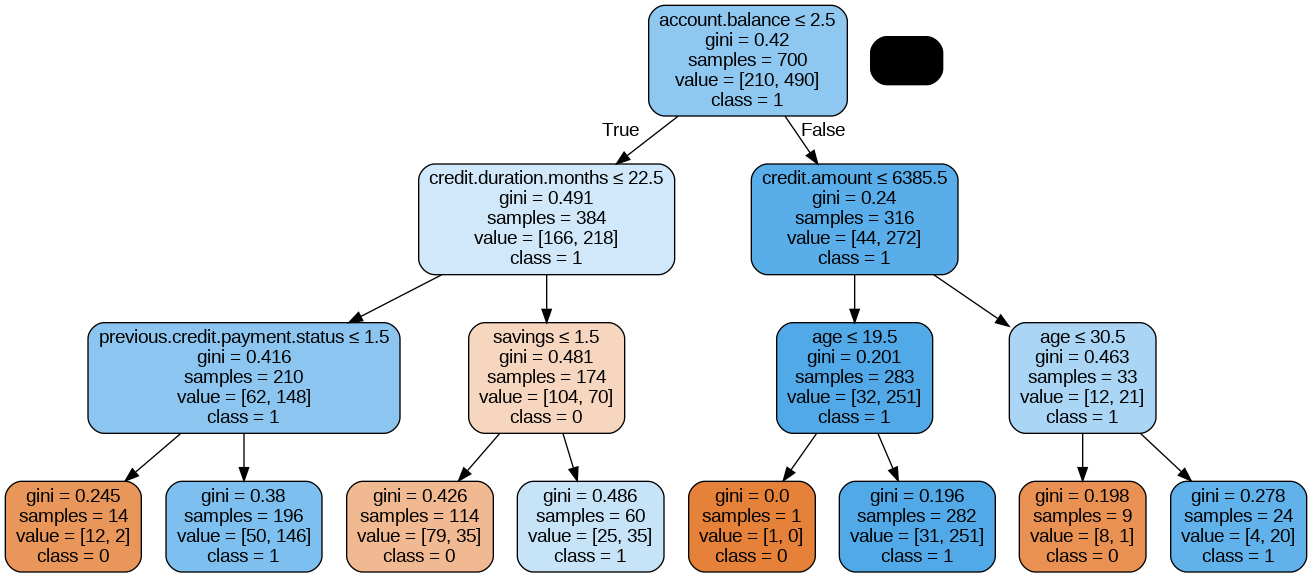

In [32]:
# 시각화
import numpy as np
feature_names = feature_columns
target_names = np.array(['0', '1'])

import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(clf, feature_names = feature_names,
                              class_names = target_names,
                              filled = True, rounded = True,
                              special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

## DecisionTreeRegressor

In [ ]:
# 샘플데이터 생성하기
import numpy as np
np.random.seed(0)
x = np.sort(5 * np.random.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

# 타깃데이터에 노이즈 추가하기
y[::1] += 1 * (0.5 - np.random.rand(400))

# 데이터 분할
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    train_size = 0.7,
                                                    random_state = 1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

# 모델 학습
from sklearn.neighbors import KNeighborsRegressor
knn_uni = KNeighborsRegressor(n_neighbors = 20, weights = 'uniform')
knn_dis = KNeighborsRegressor(n_neighbors = 20, weights = 'distance')

knn_uni.fit(train_x, train_y)
knn_dis.fit(train_x, train_y)